(parameters)=

# Plot Parameters

This notebook shows an example on how to import and plot some parameters of the SLSN population. First, lets import the necessary functions.

In [1]:
from slsne.utils import get_params

If you want to get all the parameters and metadata of a single supernova, you can read them in like such:

In [2]:
params = get_params('2018ibb')

# Print the metadata of the supernova
for key in params.meta:
    print(key, params.meta[key])

Name 2018ibb
RA_deg 69.737292
DEC_deg -20.66225
Redshift 0.166
Method Host_lines
EBV 0.0275
Explosion 58327.36
Peak 58459.42
Quality Gold
Survey ZTF


In [5]:
# Or print all parameters of the first 10 walkers
print(params[:10])

texplosion fnickel  Pspin  log(Bfield) ... tau_1 delta_m15   r_peak    frac 
---------- ------- ------- ----------- ... ----- --------- --------- -------
 -20.16574 0.25287 3.62675      13.788 ... 136.0   0.02121 -21.51775 0.46098
  -17.3132 0.45856  7.7813     14.2483 ... 138.0   0.02445 -21.49196 0.09102
 -16.47454 0.45734 8.09464    14.55921 ... 140.0   0.02437 -21.49538 0.09461
 -16.94595 0.35933 3.91904    13.98478 ... 142.0   0.02015 -21.55835 0.25883
 -17.45062 0.41623   9.047    13.90106 ... 134.0    0.0206 -21.50674 0.06089
  -17.8253  0.2821 7.99372    14.31396 ... 142.0      0.02 -21.48524 0.07226
 -19.01995 0.37374 5.30252    14.08942 ... 142.0   0.02217 -21.47967 0.26878
 -24.06508 0.00161 1.85938    13.56644 ... 124.0   0.02633 -21.56224 0.99875
 -23.87591 0.43475 2.21167    13.98676 ... 132.0   0.02158 -21.46597 0.63855
 -18.83011 0.33066 6.50065    14.03068 ... 146.0   0.02553 -21.47144 0.13992


Note that the values for `Explosion` and `Peak` found in the reference data might differ slightly from the mean of the `MJD0` and `Peak_MJD` columns. The former are kept constant for reference through the codebase to avoid having different references change. The latter are the most up to date values derived from the latest fits.

Users can also use the `get_params` function to get the values for either a single parameter, or a list of parameters.

In [12]:
# Import the parameters
x_param, y_param = 'Pspin','mejecta'
params = get_params(param_names = [x_param, y_param])

# The output will be a table with the mean value, lower 1-sigma, and upper 1-sigma values for each parameter
print(params[0])

Pspin_med Pspin_up Pspin_lo mejecta_med mejecta_up mejecta_lo
--------- -------- -------- ----------- ---------- ----------
  3.61332  4.60652  2.26994      2.4408     4.4225    0.92677


Now we can plot the results.

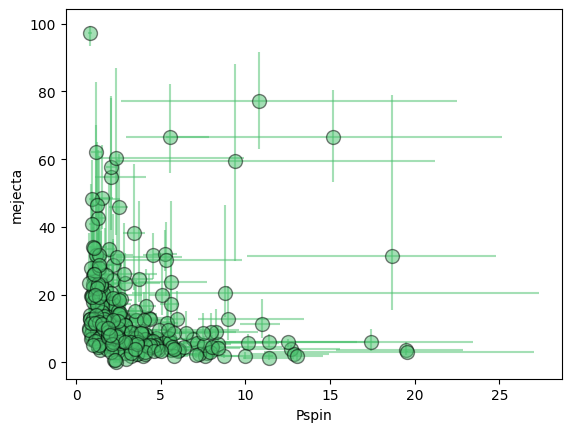

In [13]:
import matplotlib.pyplot as plt
# Import colorblind friendly green
from slsne.utils import cb_g

# Plot individual light curves shaded.
plt.errorbar(params[f'{x_param}_med'], params[f'{y_param}_med'], xerr = [params[f'{x_param}_lo'], params[f'{x_param}_up']],
             yerr = [params[f'{y_param}_lo'], params[f'{y_param}_up']], fmt = 'o', color = cb_g, markersize = 10, alpha = 0.5,
             markeredgecolor = 'k', zorder = 300 )
plt.xlabel(x_param)
plt.ylabel(y_param)
plt.show();

Alternatively, you can use the built in plotting function, which will save the plot directly and use the saved formatted names and recommended limits.

In [10]:
from slsne.plots import make_plot
make_plot('Pspin', 'mejecta')